In [ ]:
# https://datascienceschool.net/view-notebook/ef921dc25e01437b9b5c532ba3b89b02/
# Install system packages 

!pip install geopandas 
!pip install descartes
!pip install mapclassify

In [2]:
# Install fonts and initialize plt-fontsetting

! ./nanum.sh
%run setting4pltfont.py

Hit:1 http://mirror.kakao.com/ubuntu bionic InRelease                      
Hit:2 http://mirror.kakao.com/ubuntu bionic-updates InRelease                  
Hit:3 http://mirror.kakao.com/ubuntu bionic-backports InRelease                
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]    
Fetched 88.7 kB in 1s (78.0 kB/s)   
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (2

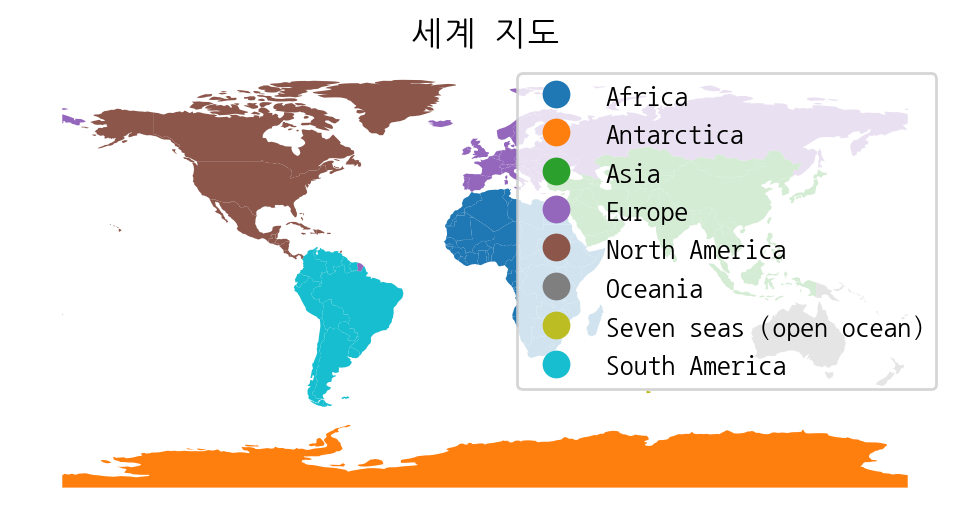

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
gpd.__version__

countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

countries.tail(3)
ax = countries.plot(column="continent", legend=True, categorical=True)
ax.set_title("세계 지도")
ax.set_axis_off()
plt.show()

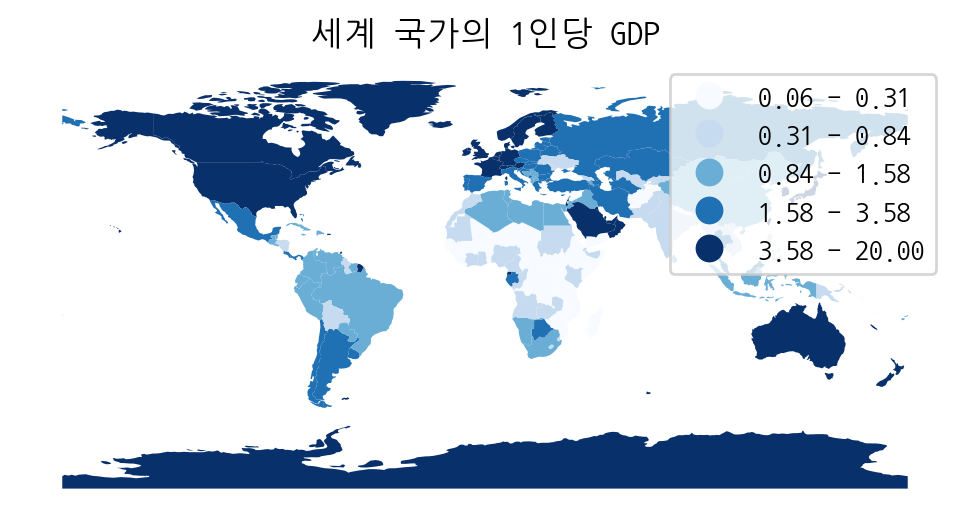

In [4]:
# 1인당 GDP 연산
#!pip install mapclassify
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

ax = countries.plot(column='gdp_per_cap', legend=True, scheme='quantiles', cmap="Blues", k=5)
ax.set_axis_off()
ax.set_title("세계 국가의 1인당 GDP")
plt.show()

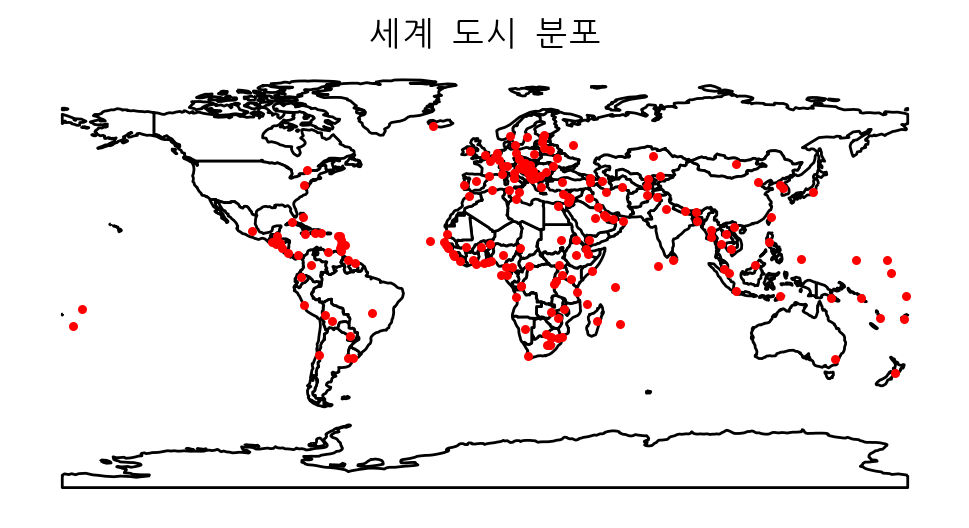

In [5]:
base = countries.plot(color='white', edgecolor="k")
ax = cities.plot(ax=base, marker='o', color='red', markersize=5)
ax.set_axis_off()
ax.set_title("세계 도시 분포")
plt.show()

In [ ]:
korea_border = countries[countries.name == "Korea"].geometry
korea_border.boundary.squeeze()

In [6]:
seoul_file = "./geodata/서울특별시/TL_KODIS_BAS_11.shp"
seoul = gpd.read_file(seoul_file, encoding='euckr')
seoul.tail(3)

,BAS_MGT_SN,CTP_KOR_NM,SIG_CD,SIG_KOR_NM,BAS_ID,BAS_AR,NTFC_DE,MVMN_DE,MVMN_RESN,OPERT_DE,geometry
5662,1129000046,서울특별시,11290,성북구,02851,0.052,20121221,20121221,국가기초구역 최초생성,20121221000000,"POLYGON ((957702.910 1954159.861, 957702.912 1..."
5663,1129000047,서울특별시,11290,성북구,02822,1.087,20121221,20121221,국가기초구역 최초생성,20121221000000,"POLYGON ((954675.916 1956603.960, 954675.984 1..."
5664,1129000068,서울특별시,11290,성북구,02838,0.126,20121221,20121221,국가기초구역 최초생성,20121221000000,"POLYGON ((955414.324 1955463.203, 955410.167 1..."


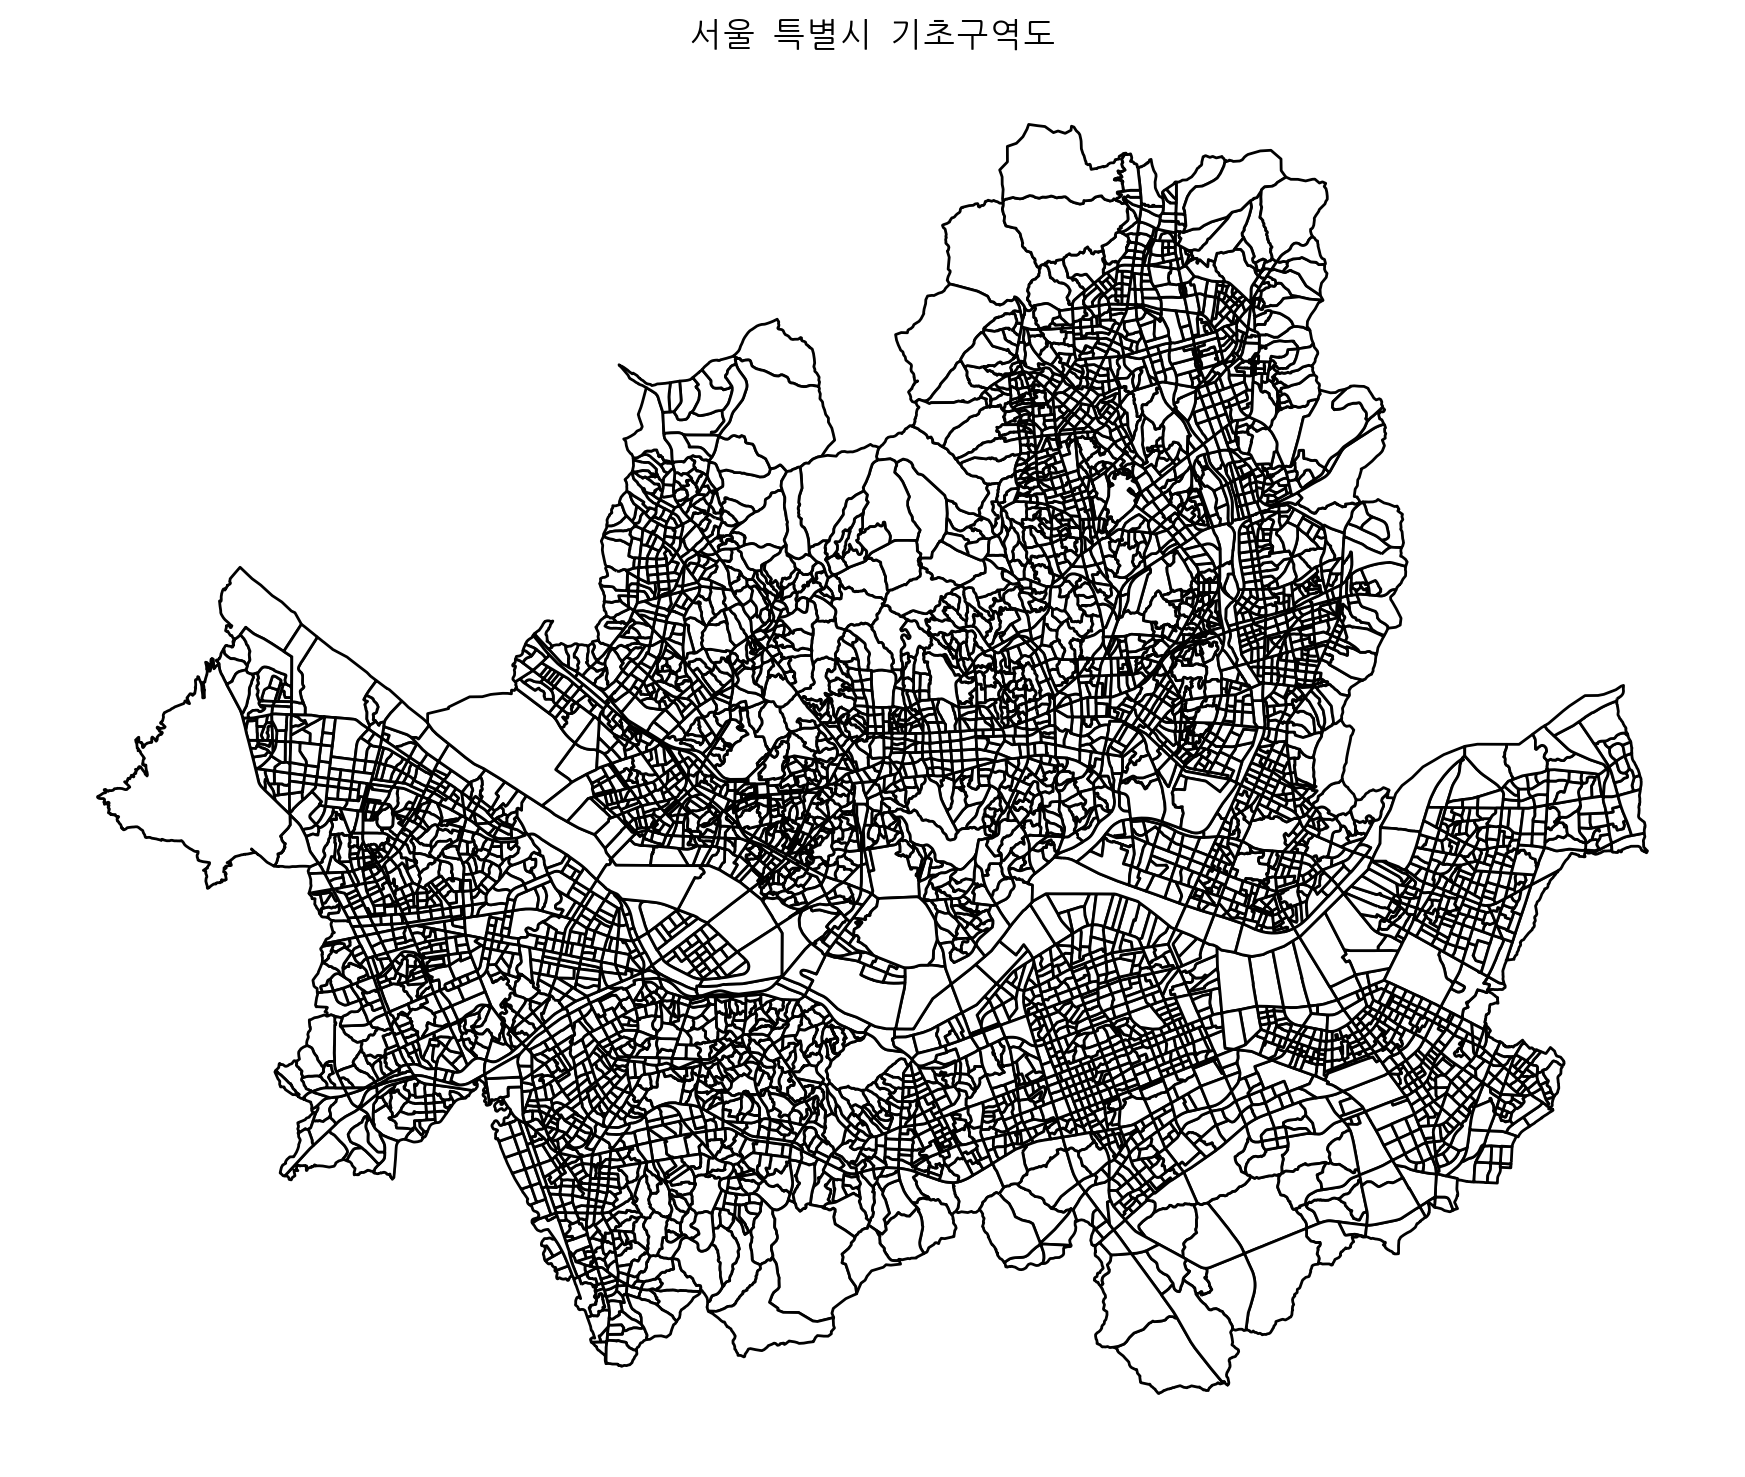

In [7]:
ax = seoul.plot(figsize=(11, 11), color="w", edgecolor="k")
ax.set_title("서울 특별시 기초구역도")
ax.set_axis_off()
plt.show()

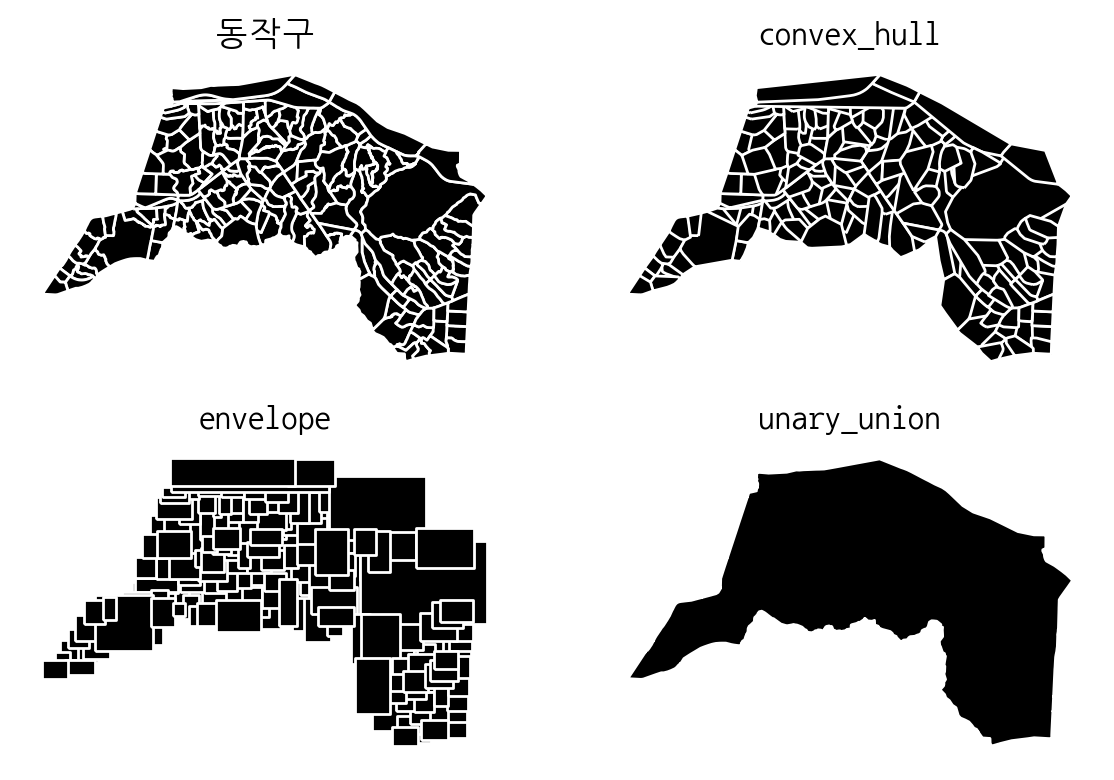

In [8]:
sample = seoul[seoul.SIG_KOR_NM == "동작구"]

ax = plt.subplot(2, 2, 1)
sample.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("동작구")
ax.set_axis_off()

ax = plt.subplot(2, 2, 2)
sample.convex_hull.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("convex_hull")
ax.set_axis_off()

ax = plt.subplot(2, 2, 3)
sample.envelope.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("envelope")
ax.set_axis_off()

ax = plt.subplot(2, 2, 4)
gpd.GeoSeries([sample.geometry.buffer(0.1).unary_union]
              ).plot(ax=ax, color="k", edgecolor='w')
ax.set_title("unary_union")
ax.set_axis_off()

plt.tight_layout()
plt.show()


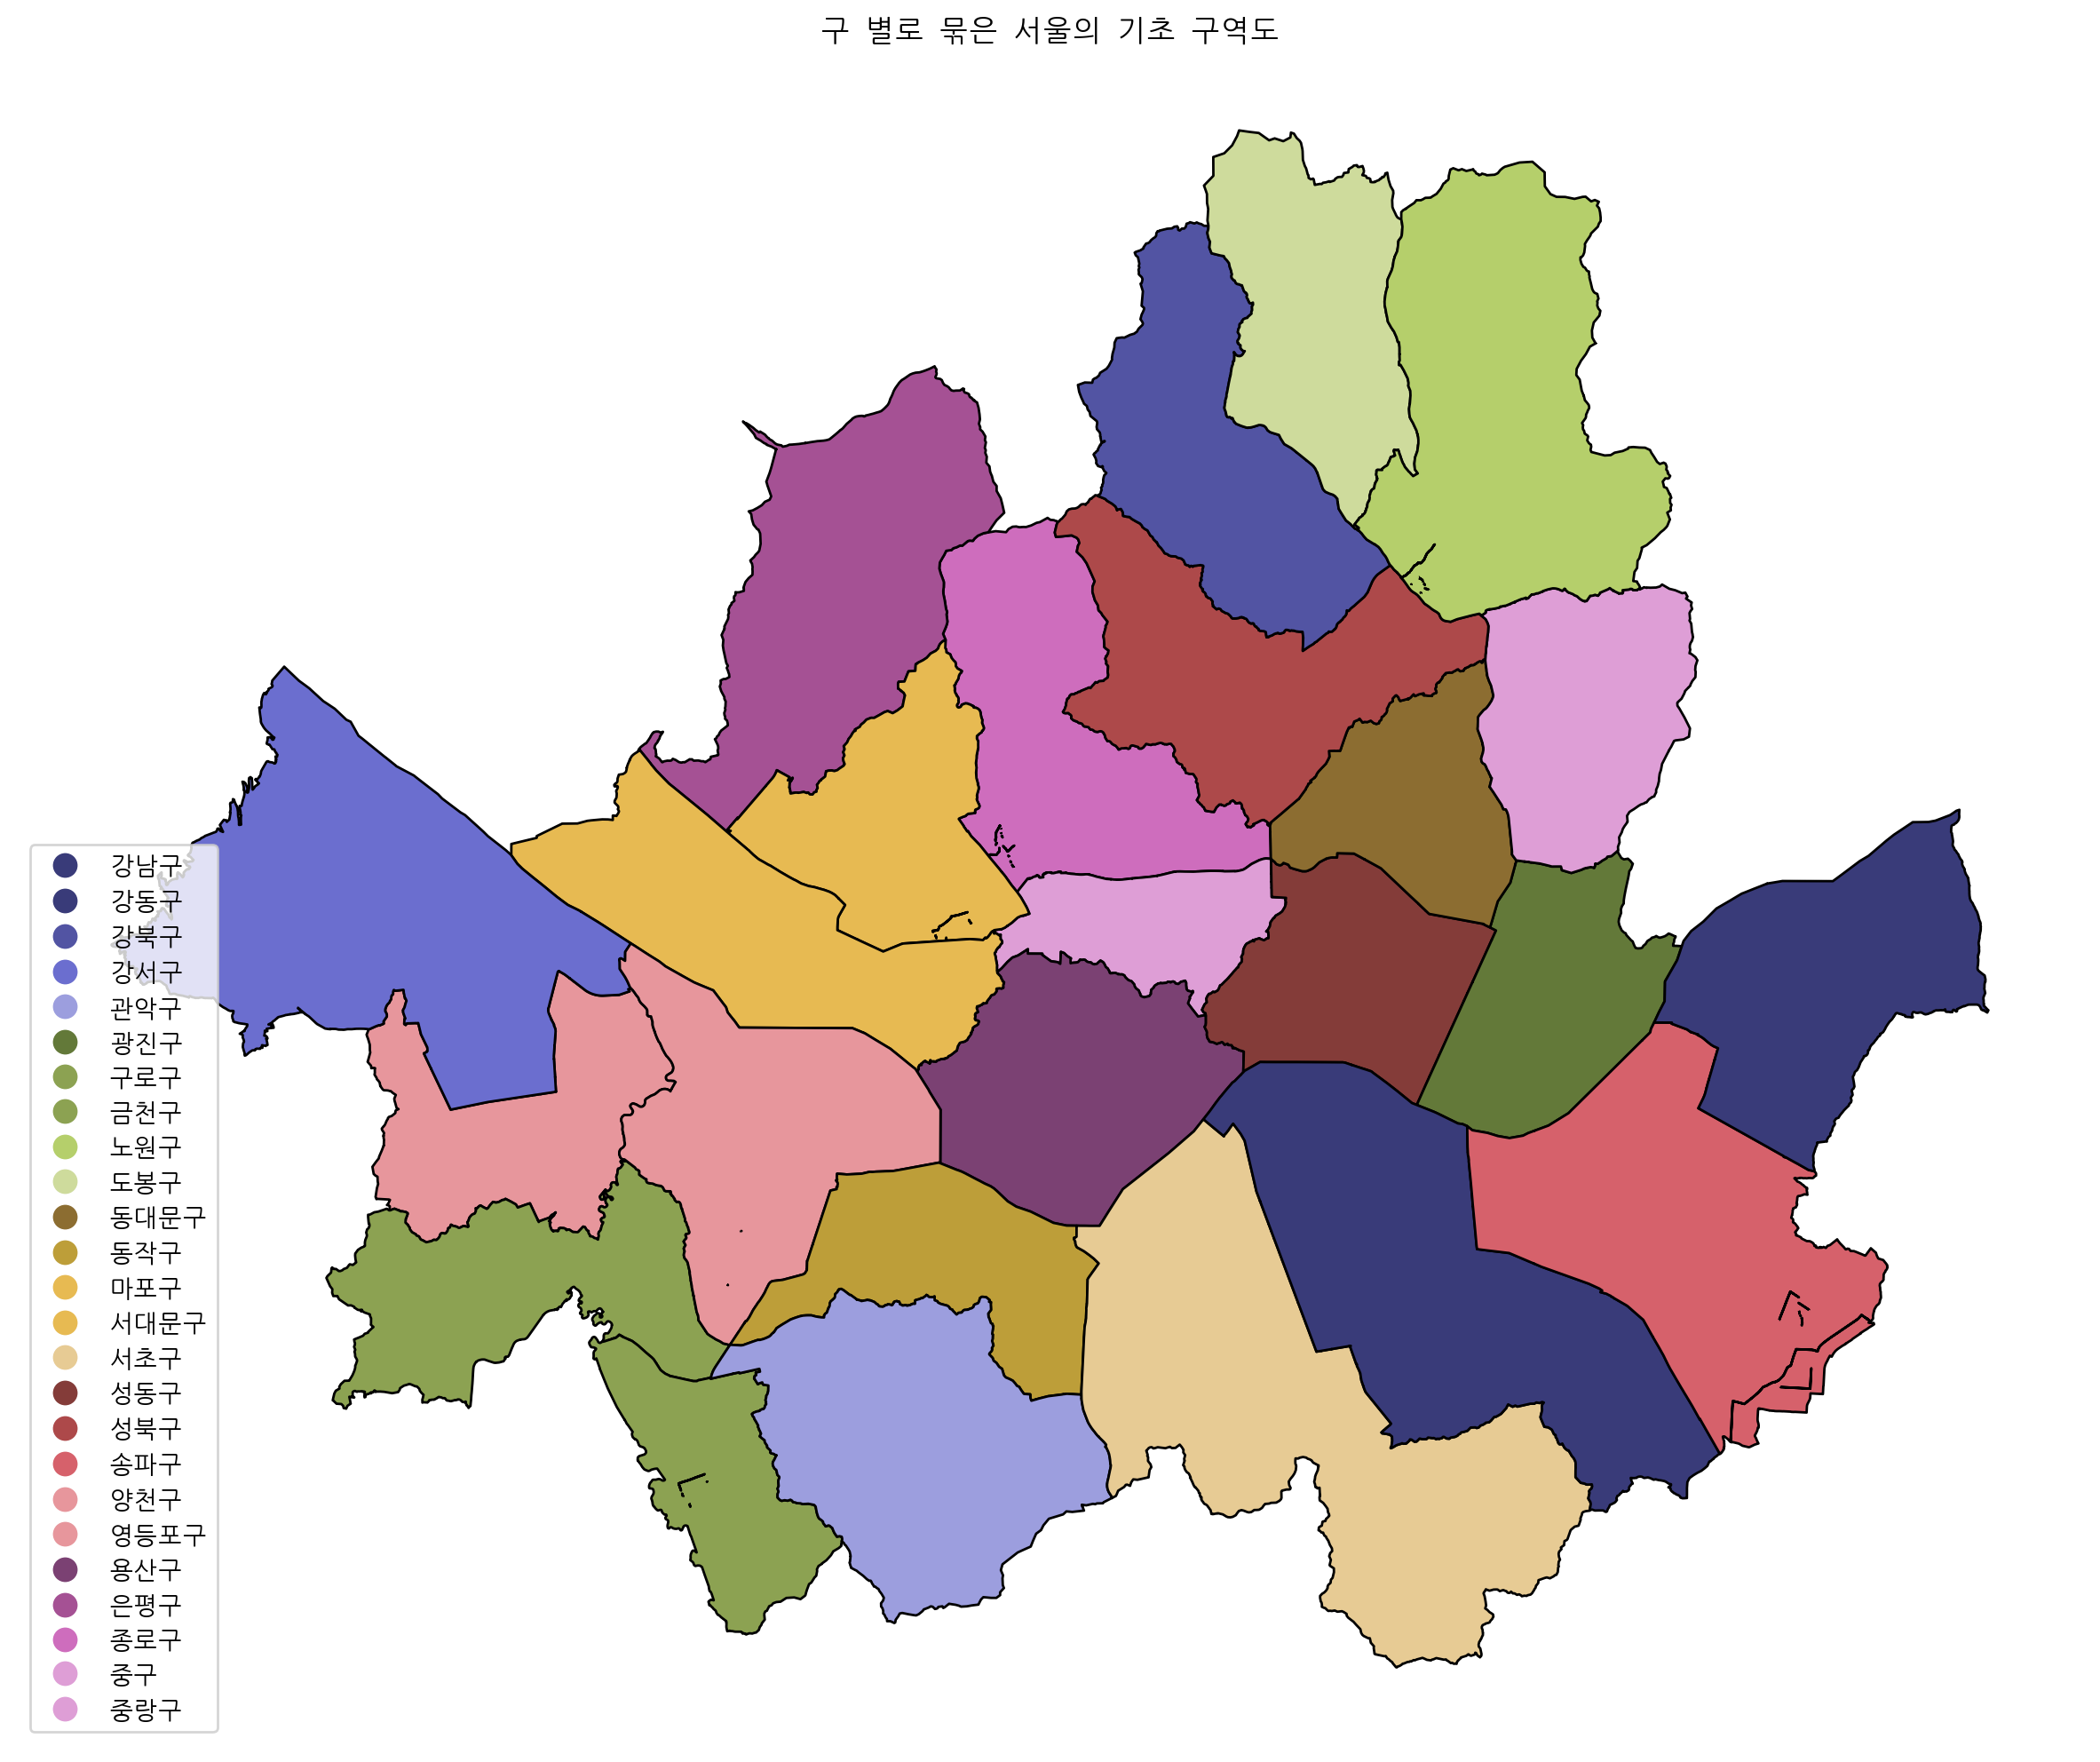

In [9]:
seoul.geometry = seoul.buffer(0.001)
seoul = seoul.dissolve(by='SIG_CD')
ax = seoul.plot(figsize=(15, 15), column="SIG_KOR_NM", categorical=True,
                cmap="tab20b", edgecolor="k", legend=True, legend_kwds={'loc': 3})
ax.set_title("구 별로 묶은 서울의 기초 구역도")
ax.set_axis_off()
plt.show()

In [10]:
# 이전의 좌표계와 비교해보자.
countries_mercator = countries.to_crs(epsg=3857)

print(countries_mercator.geometry[113])

POLYGON ((2614241.130436479 7153601.785967642, 2619073.309504622 7070435.576908913, 2649953.234787723 6999613.069934944, 2649314.696839432 6926062.815965137, 2582555.841975352 6888660.742470466, 2616898.828923959 6804402.184097363, 2619021.536157463 6724260.516108001, 2675005.782218406 6569348.070398897, 2663069.149401261 6520185.512981648, 2607826.987982927 6499876.023004116, 2506742.403952631 6356150.5315977, 2535459.353843322 6279511.087609828, 2511160.396243507 6289421.884152673, 2405370.190215897 6355008.512342297, 2325236.554002487 6330832.415777707, 2272680.854042278 6348389.632347571, 2206911.445368343 6311783.649685667, 2150771.879265926 6372407.960023718, 2105004.240377634 6349141.515028634, 2098722.407589048 6359484.52348315, 2047489.804278448 6444306.756093701, 1964727.232548202 6454772.762874234, 1954165.469727828 6509230.959613078, 1877822.79304526 6528767.982364263, 1861203.548607317 6483723.521564444, 1800732.279125956 6519788.224792923, 1807675.660239352 6567999.294549

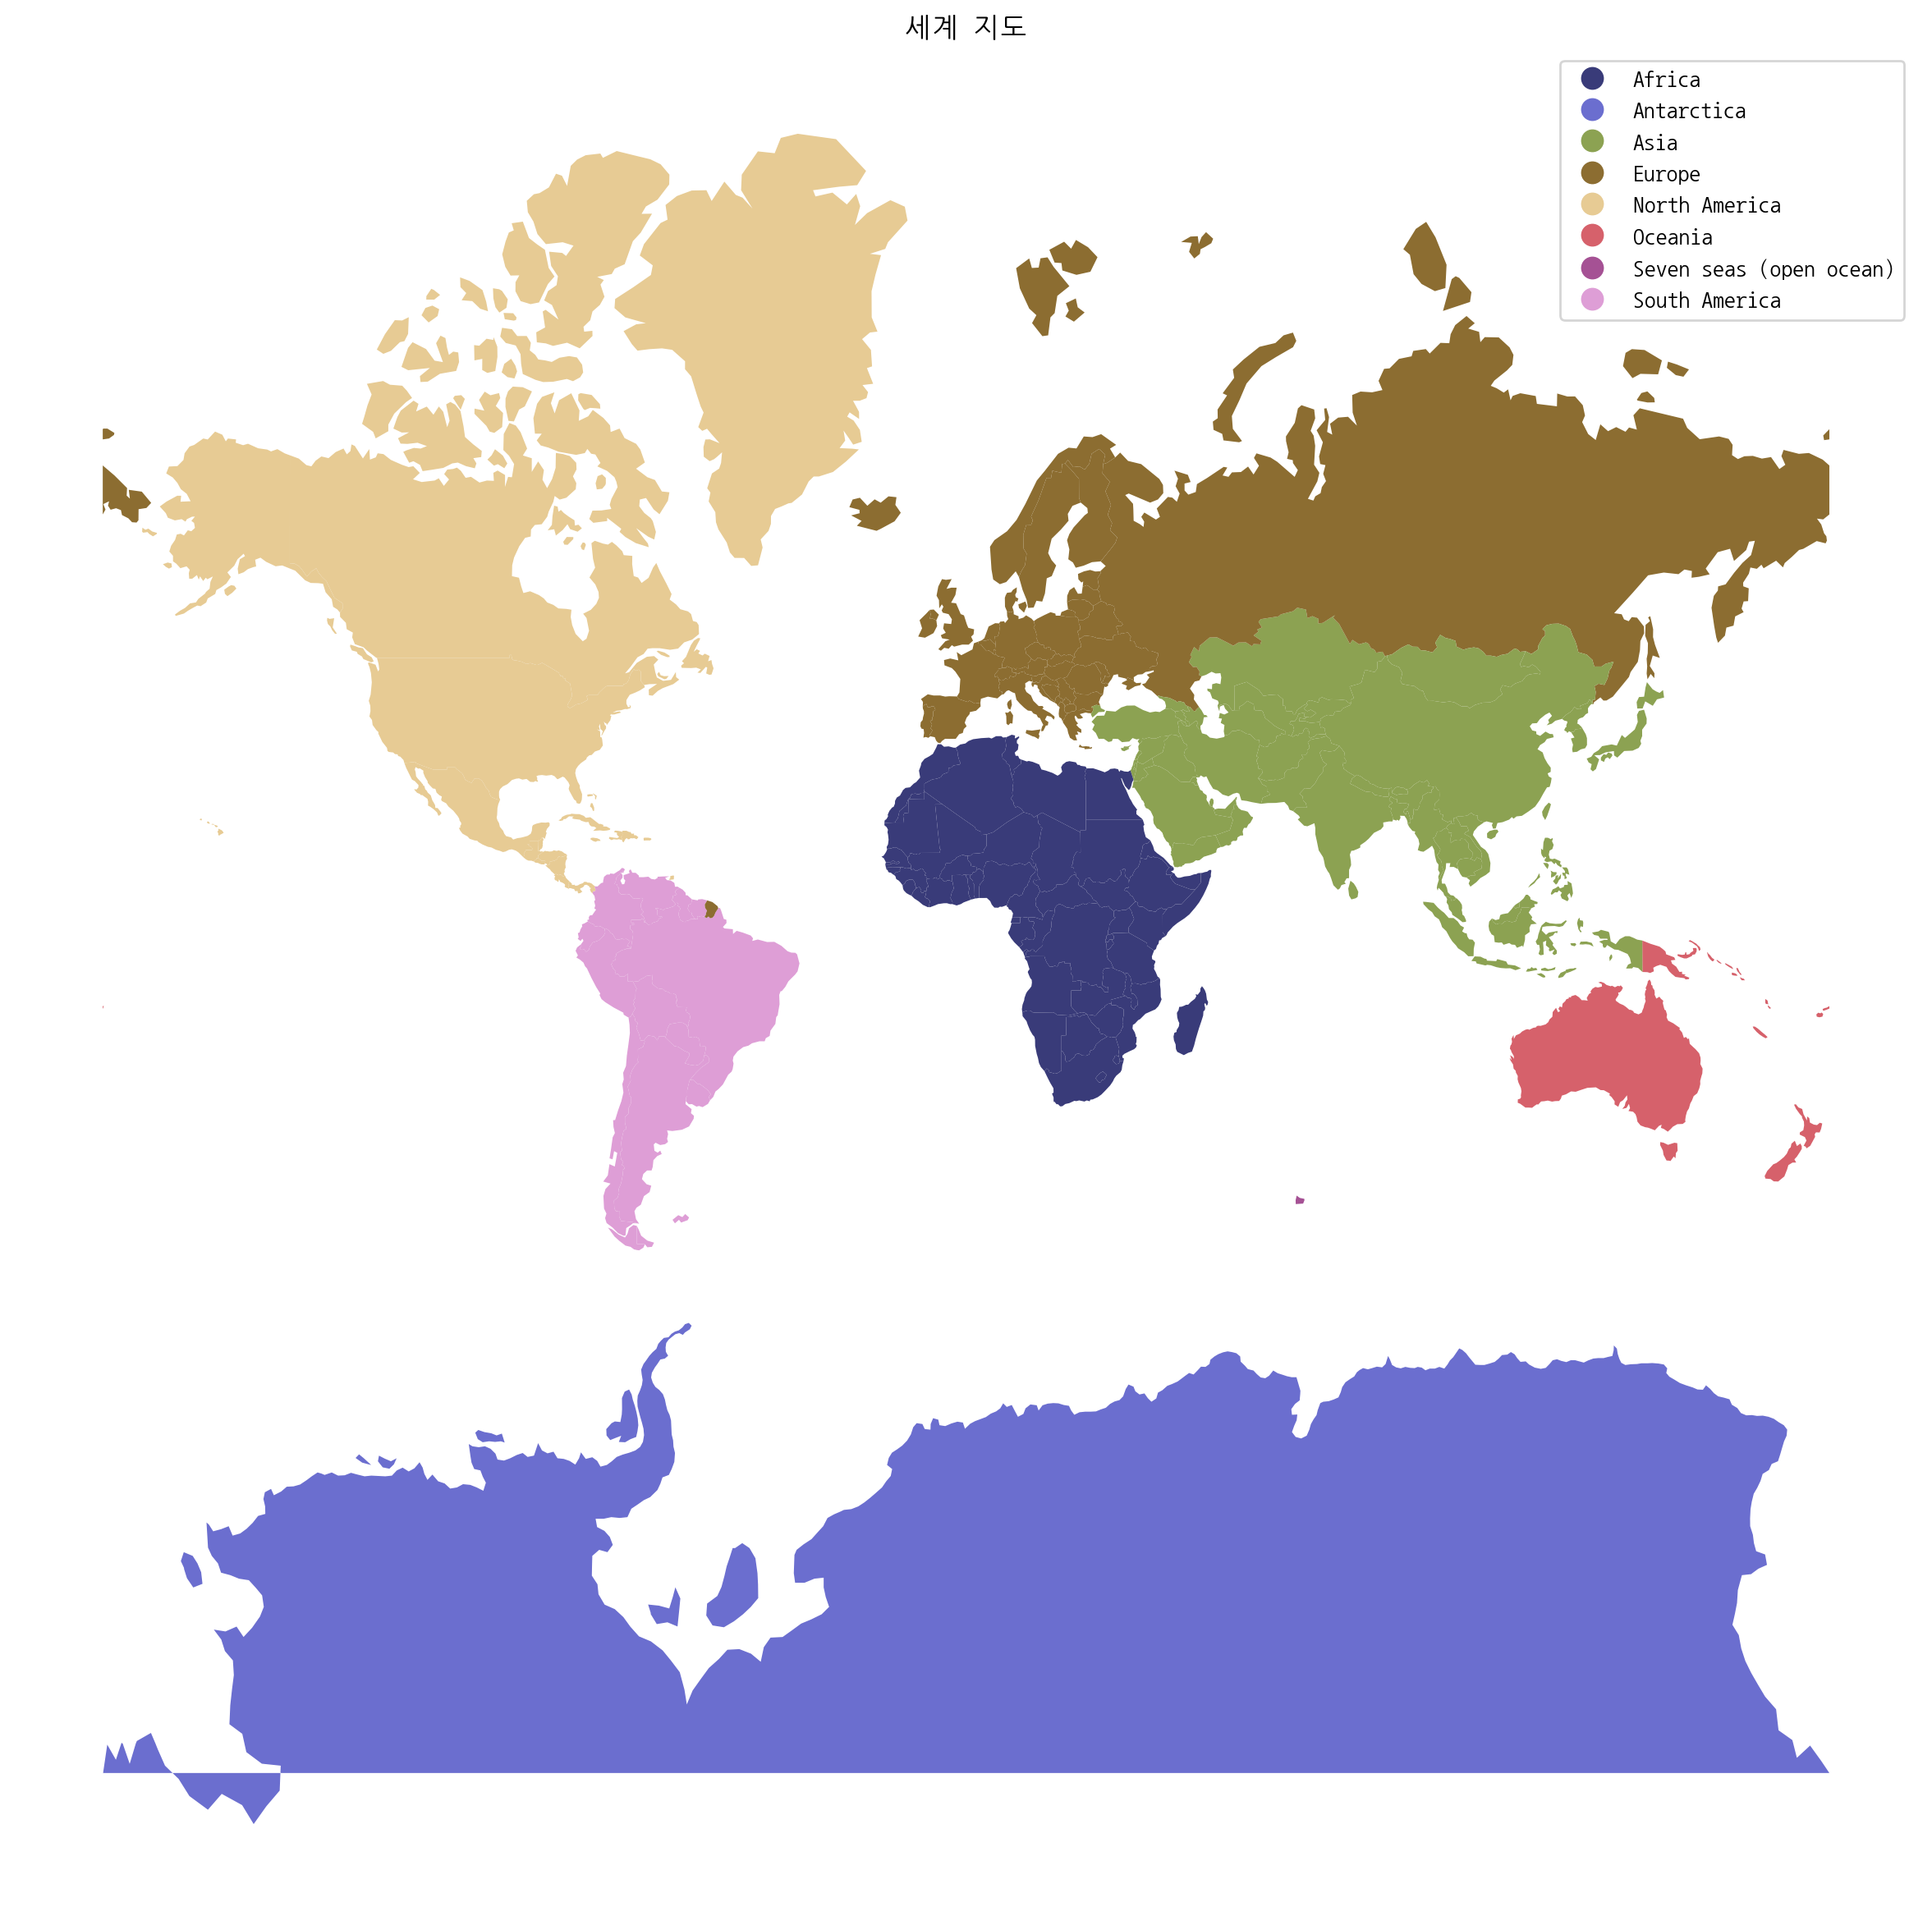

In [11]:
ax = countries_mercator.plot(
    figsize=(15, 15), column='continent', cmap="tab20b", legend=True, categorical=True)
ax.set_title("세계 지도")
ax.set_axis_off()
plt.show()